In [2]:
# Importar bibliotecas
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib.widgets import Slider
import numpy as np
import cv2 as cv
from scipy.optimize import curve_fit
from scipy.ndimage import median_filter
import h5py
import os

In [3]:
cachimbo = np.load(fr"D:\microxplorer\TC3_Sapinho_20251028\sino_correted_align.npz")
cachimbo = cachimbo['sino']
print(cachimbo.shape, cachimbo.dtype, cachimbo.min(), cachimbo.max())
imgSrc = cachimbo

(400, 800, 1200) float32 0.01 1.3919309


In [4]:
print(imgSrc.shape)

(400, 800, 1200)


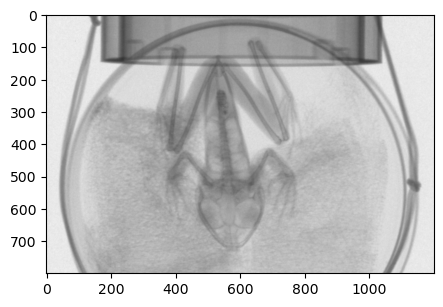

In [8]:
plt.rcParams["figure.figsize"]=5,5
fig = plt.figure()
ax = plt.axes()
ax.imshow(imgSrc[10, :,:], 'gray', vmin=imgSrc.min(), vmax=imgSrc.max()*0.8)

In [9]:
print(imgSrc.shape)
print(imgSrc.shape[0], imgSrc.shape[1], imgSrc.shape[2])
minVal = imgSrc.min()
maxVal = imgSrc.max()
print(minVal, maxVal, imgSrc.mean())

(400, 800, 1200)
400 800 1200
0.01 1.3919309 0.8184162


In [ ]:
##imgSrc[imgSrc > 1] = 1

In [10]:
imgSrc = (((imgSrc-minVal)/(maxVal-minVal))*65535).astype("uint16")

print(imgSrc.min(), imgSrc.max(), imgSrc.mean())

0 65535 38336.859519221354


In [11]:
for i in range(imgSrc.shape[0]):
    imgSrc[i, :, :] = imgSrc[i, ::-1, :]

    

In [12]:
imgSrc = imgSrc/65535

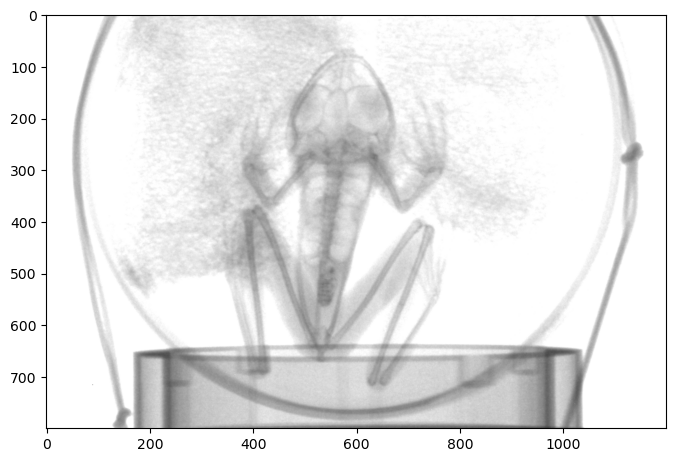

In [13]:
plt.rcParams["figure.figsize"]=8,6
fig = plt.figure()
ax = plt.axes()
ax.imshow(imgSrc[15, :,:], 'gray', vmin=imgSrc.min(), vmax=imgSrc.max()*0.6)

In [14]:
#Coloca a metade das projeções como frames

width = 1200 
height = 800
framesNumber = (imgSrc.shape[0]//1)
time = 40
fps = framesNumber/time

fourcc = cv.VideoWriter_fourcc(*'mp4v')
video = cv.VideoWriter('test.mp4', fourcc, float(fps), (width, height))

#print(framesNumber)

for i in range(0, imgSrc.shape[0], 4):
    img = imgSrc[i, :, :]*1.5
    img[img > 1] = 1
    img = (img)*255
    img = img.astype(np.uint8)
    print(i, img.shape, img.max(), img.min(), img.mean(), np.isnan(img).sum())
    video.write(cv.cvtColor(img, cv.COLOR_GRAY2BGR))
    #video.write(img)

video.release() 

0 (800, 1200) 255 0 213.35400208333334 0
4 (800, 1200) 255 0 213.491071875 0
8 (800, 1200) 255 0 213.585128125 0
12 (800, 1200) 255 0 213.62262291666667 0
16 (800, 1200) 255 0 213.62530208333334 0
20 (800, 1200) 255 0 213.64126770833334 0
24 (800, 1200) 255 0 213.6573375 0
28 (800, 1200) 255 0 213.65837916666666 0
32 (800, 1200) 255 0 213.60548125 0
36 (800, 1200) 255 0 213.54072708333334 0
40 (800, 1200) 255 0 213.55187395833335 0
44 (800, 1200) 255 0 213.52441458333334 0
48 (800, 1200) 255 0 213.46545 0
52 (800, 1200) 255 0 213.44553020833334 0
56 (800, 1200) 255 0 213.4815125 0
60 (800, 1200) 255 0 213.52215625 0
64 (800, 1200) 255 0 213.59816041666667 0
68 (800, 1200) 255 0 213.75957291666666 0
72 (800, 1200) 255 0 214.05899479166666 0
76 (800, 1200) 255 0 214.51407916666668 0
80 (800, 1200) 255 0 215.11201458333332 0
84 (800, 1200) 255 0 215.89575833333333 0
88 (800, 1200) 255 0 216.98773854166666 0
92 (800, 1200) 255 0 218.12687708333334 0
96 (800, 1200) 255 0 219.383796875 0
100